## 3.0 Model Building

This is where we test our models. Our methology includes setting a baseline, train test and split the dataset, testing on various models and finally settling on our final model before we try to optimize its hyper parameters for the best score. 


- [3.1 Setting our Baseline](#3.1-Setting-our-Baseline:)
- [3.2 Train, Test, Split](#3.2-Train,-Test,-Split)
- [3.3 Test & Evaluate Model Choices](#3.3-Test-&-Evaluate-Model-Choices)
- [3.4 Improving the Final Model](#3.4-Improving-the-Final-Model)



<!-- - Back to: [3.0 Model Building](#3.0-Model-Building)
- Go to [Defined Functions](#Defined-Functions:) -->

Jump to:
- [1.0 Data Collection and Cleaning](01_data_collection_&_cleaning.ipynb)
- [2.0 EDA & Data Preprocessing](02_eda_&_data_processing.ipynb)
<!-- - [3.0 Model Building](03_model_building.ipynb) -->
- [4.0 Reddit Classification Report](04_reddit_classification_report.ipynb)

#### Importing:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.metrics as metrics

plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (10,10)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Defined Functions:

In [2]:
def logreg (X_train, X_test, y_train, y_test, vectorizer_type):
    #Instantiate model
    logreg = LogisticRegression()

    #Fit model
    model= logreg.fit(X_train, y_train)

    #Generate predictions
    pred = logreg.predict(X_test)


    train_score = model.score(X_train, y_train)
    print(f"training score: {train_score}")

    test_score = model.score(X_test, y_test)
    print(f"test score: {test_score}")


    #Generate Confusion Matrix
    #Save TN/FP/FN/TP values
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print(f"True Negative: {tn}")
    print(f"False positive: {fp}")
    print(f"False Negative: {fn}")
    print(f"True Positive: {tp}")

    #specificity of our set
    spec = tn/(tn+fp)
    print(f"Specificity: {round(spec,4)}")

    #sensitivity of our set (recall)
    sens = tp/(tp+fn)
    print(f"Sensitivity/Recall: {round(sens,4)}")

    #precision of our set
    precs = tp/(tp+fp)
    print(f"Precision: {round(precs,4)}")

    #create True Values vs Pred chart
    pred_proba = [i[1] for i in logreg.predict_proba(X_test)]
    pred_df = pd.DataFrame({'true_values': y_test, 'pred_proba': pred_proba})

    #calculate score ROC AUC
    roc_auc =roc_auc_score(pred_df['true_values'], pred_df['pred_proba'])
    print(f"ROC_AUC: {round(roc_auc,4)}")
    
    # Create figure.
    plt.figure(figsize = (5,5))

    fpr, tpr, threshold = metrics.roc_curve(pred_df['true_values'], pred_df['pred_proba'])
    roc_auc = metrics.auc(fpr, tpr)

    
    #plot ROC_AUC plot
    plt.title(f"Logistic Regression - {vectorizer_type} ROC_AUC: {round(roc_auc,4)}", size=12)
    plt.plot(fpr, tpr, color='salmon', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--', color='grey')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [3]:
def mnb (X_train, X_test, y_train, y_test, vectorizer_type):
    #Instantiate model
    mnb = MultinomialNB()

    #Fit model
    model= mnb.fit(X_train, y_train)

    #Generate predictions
    pred = model.predict(X_test)


    train_score = model.score(X_train, y_train)
    print(f"training score: {train_score}")

    test_score = model.score(X_test, y_test)
    print(f"test score: {test_score}")


    #Generate Confusion Matrix
    #Save TN/FP/FN/TP values
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print(f"True Negative: {tn}")
    print(f"False positive: {fp}")
    print(f"False Negative: {fn}")
    print(f"True Positive: {tp}")

    #specificity of our set
    spec = tn/(tn+fp)
    print(f"Specificity: {round(spec,4)}")

    #sensitivity of our set (recall)
    sens = tp/(tp+fn)
    print(f"Sensitivity/Recall: {round(sens,4)}")

    #precision of our set
    precs = tp/(tp+fp)
    print(f"Precision: {round(precs,4)}")

    #create True Values vs Pred chart
    pred_proba = [i[1] for i in mnb.predict_proba(X_test)]
    pred_df = pd.DataFrame({'true_values': y_test, 'pred_proba': pred_proba})

    #calculate score ROC AUC
    roc_auc =roc_auc_score(pred_df['true_values'], pred_df['pred_proba'])
    print(f"ROC_AUC: {round(roc_auc,4)}")
    
    # Create figure.
    plt.figure(figsize = (5,5))

    fpr, tpr, threshold = metrics.roc_curve(pred_df['true_values'], pred_df['pred_proba'])
    roc_auc = metrics.auc(fpr, tpr)

    
    #plot ROC_AUC plot
    plt.title(f"Multinomial NB - {vectorizer_type} ROC_AUC: {round(roc_auc,4)}", size=12)
    plt.plot(fpr, tpr, color='salmon', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--', color='grey')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

***

#### Read in data:

In [4]:
#read in dataset
cvec_X = pd.read_csv('../datasets/cvec_x_data.csv')
tvec_X = pd.read_csv('../datasets/tvec_x_data.csv')
norm_data = pd.read_csv('../datasets/stem_data.csv')

***

## 3.1 Setting our Baseline:

- Back to: [3.0 Model Building](#3.0-Model-Building)
- Go to [Defined Functions](#Defined-Functions:)

In [5]:
# view number of counts
norm_data['label'].value_counts()

0    892
1    345
Name: label, dtype: int64

In [6]:
# view percentage of counts
norm_data['label'].value_counts(normalize=True)

0    0.721099
1    0.278901
Name: label, dtype: float64

<div class="alert alert-block alert-info">
<b>Baseline: 0.7211 </b> 
    
The simplest possible prediction would be for all post to belong to the majority of Horror and my predictions would be correct 72.11% of the time.     

</div>

***

## 3.2 Train, Test, Split

- Back to: [3.0 Model Building](#3.0-Model-Building)
- Go to [Defined Functions](#Defined-Functions:)

In [7]:
# setting X and y targets (both)
X_cvec = cvec_X
X_tvec = tvec_X
y = norm_data['label']

#spliting into train and test sets (cvec)
cvec_X_train, cvec_X_test, cvec_y_train, cvec_y_test = train_test_split(X_cvec, y, test_size = 0.2, stratify=y, random_state=88)


#spliting into train and test sets (tvec)
tvec_X_train, tvec_X_test, tvec_y_train, tvec_y_test = train_test_split(X_tvec, y, test_size = 0.2, stratify=y, random_state=88)

<div class="alert alert-block alert-info">
<b>Train, Test, Split: </b> 
    
I have split these into 2 groups, one containing the CountVectorizer (cvec) output, the other contianing the TD-IDF (tvec) output. They will be used to fit our intial models below.
    
    
    
</div>

***

## 3.3 Test & Evaluate Model Choices



1. Logistic Regression with Cvec
2. Logistic Regression with Tvec
3. Multinormial Naive Bayes with Cvec
4. Multinormial Naive Bayes with Tvec


>The models have been preloaded into a function to return the following:
>- training score
>- test score
>- True Negative
>- False positive
>- False Negative
>- True Positive
>- Specificity
>- Sensitivity/Recall
>- Precision
>- ROC_AUC
>- ROC_AUC Curve


- Back to: [3.0 Model Building](#3.0-Model-Building)
- Go to [Defined Functions](#Defined-Functions:)

training score: 0.9949443882709808
test score: 0.8991935483870968
True Negative: 170
False positive: 9
False Negative: 16
True Positive: 53
Specificity: 0.9497
Sensitivity/Recall: 0.7681
Precision: 0.8548
ROC_AUC: 0.9535


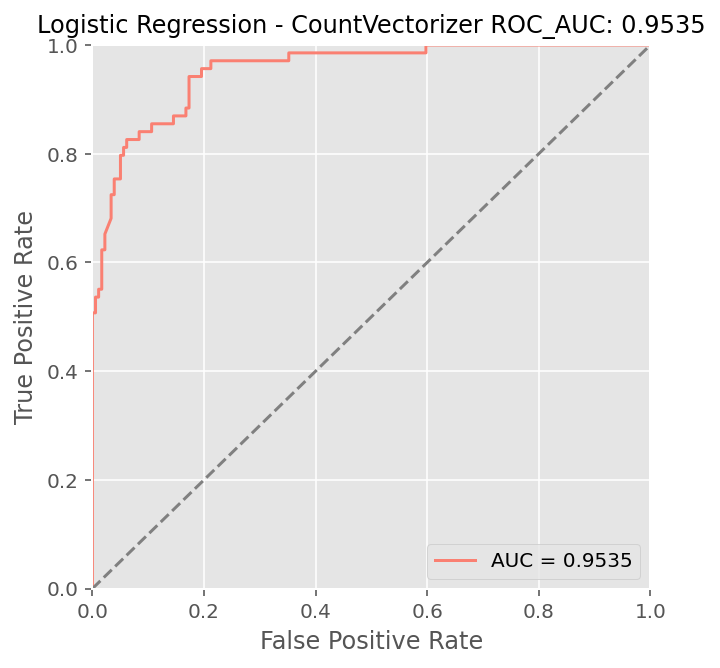

In [8]:
#1. Logistic Regression with Cvec
logreg(cvec_X_train, cvec_X_test, cvec_y_train, cvec_y_test, 'CountVectorizer')

training score: 0.9029322548028311
test score: 0.8266129032258065
True Negative: 179
False positive: 0
False Negative: 43
True Positive: 26
Specificity: 1.0
Sensitivity/Recall: 0.3768
Precision: 1.0
ROC_AUC: 0.9521


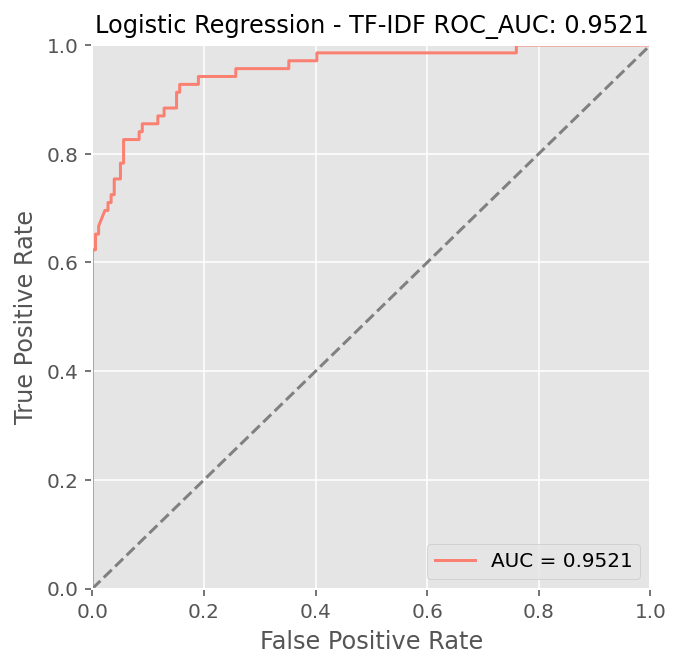

In [9]:
#2. Logistic Regression with Tvec
logreg(tvec_X_train, tvec_X_test, tvec_y_train, tvec_y_test, 'TF-IDF')

training score: 0.9625884732052579
test score: 0.8870967741935484
True Negative: 173
False positive: 6
False Negative: 22
True Positive: 47
Specificity: 0.9665
Sensitivity/Recall: 0.6812
Precision: 0.8868
ROC_AUC: 0.9599


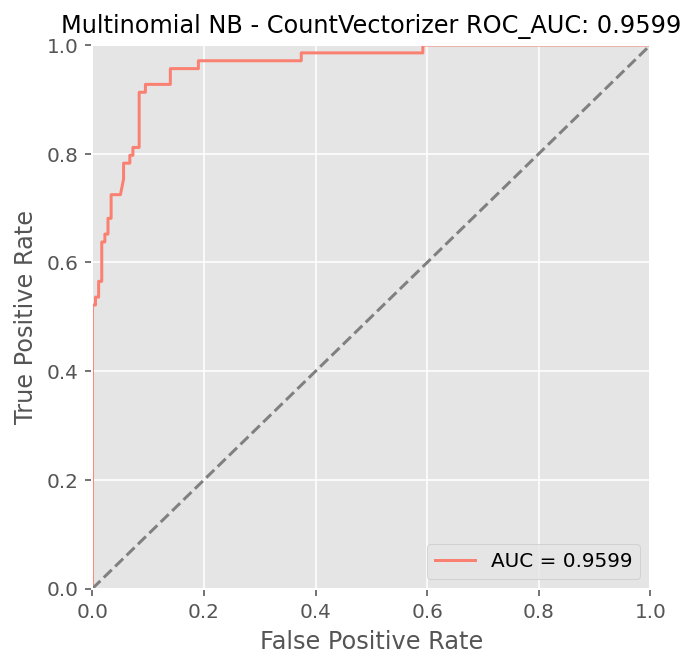

In [10]:
#3. Multinormial Naive Bayes with Cvec
mnb(cvec_X_train, cvec_X_test, cvec_y_train, cvec_y_test, 'CountVectorizer')

training score: 0.8594539939332659
test score: 0.7943548387096774
True Negative: 179
False positive: 0
False Negative: 51
True Positive: 18
Specificity: 1.0
Sensitivity/Recall: 0.2609
Precision: 1.0
ROC_AUC: 0.9459


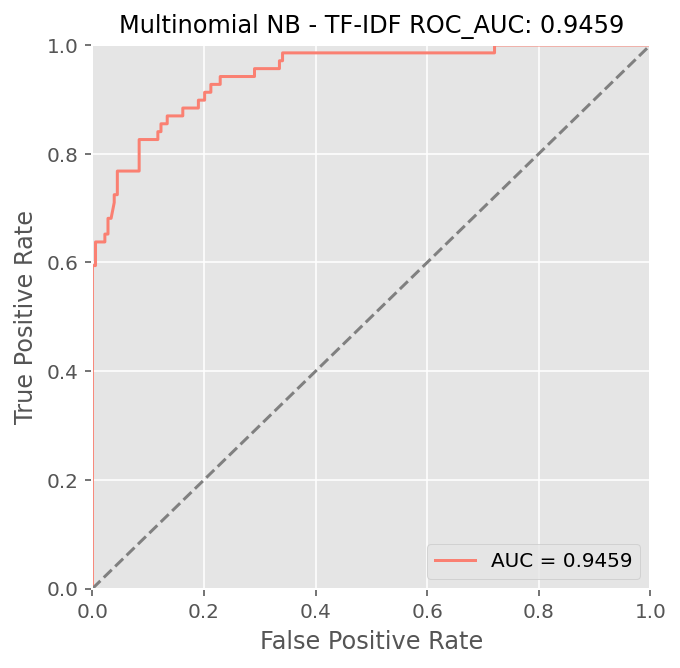

In [11]:
#4. Multinormial Naive Bayes with Tvec
mnb(tvec_X_train, tvec_X_test, tvec_y_train, tvec_y_test, 'TF-IDF')

<div class="alert alert-block alert-info">
<b>Model:</b> All four models have very good ROC_AUC score, however, Model 3 - Multinomial Model with Cvec gave the highest score. I was actually expecting the TF-IDF to give better results. I will be using Model 3 as the final Model and proceed to tune its hyperparameters to try improve its scores.
</div>

***

## 3.4 Improving the Final Model

- Back to: [3.0 Model Building](#3.0-Model-Building)
- Go to [Defined Functions](#Defined-Functions:)

In [12]:
# MultinormialNB, Cvec on GridSearchCV

#tuning alphas
param_mnb = {'alpha': np.logspace(-1,1,10,)}

#scoring by roc_auc, with optimal cv=8
gs_mnb= GridSearchCV(estimator=MultinomialNB(),
                    param_grid=param_mnb,
                    n_jobs=-1,
                    cv=8, verbose=1, scoring='roc_auc') 

#fitting cvec train set
gs_mnb.fit(cvec_X_train, cvec_y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


GridSearchCV(cv=8, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [13]:
#average roc_auc score on left-out test folds for best parameter combination
gs_mnb.best_score_

0.9472239598086425

In [14]:
#best estimators
gs_mnb.best_estimator_

MultinomialNB(alpha=0.46415888336127786, class_prior=None, fit_prior=True)

In [15]:
# ROC_AUC score
gs_mnb.score(cvec_X_test,cvec_y_test)

0.9577362156910372

True Negative: 171
False positive: 8
False Negative: 18
True Positive: 51
Specificity: 0.9553
Sensitivity/Recall: 0.7391
Precision: 0.8644
Double-checked ROC_AUC: 0.9577


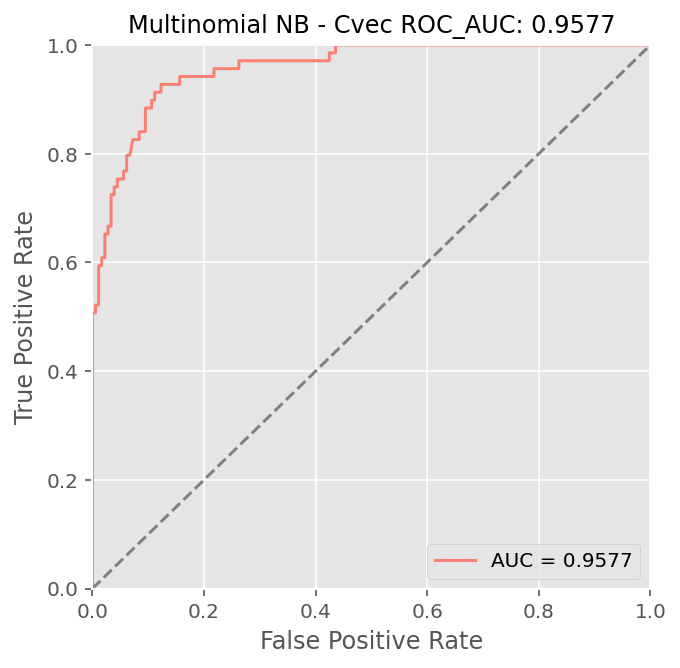

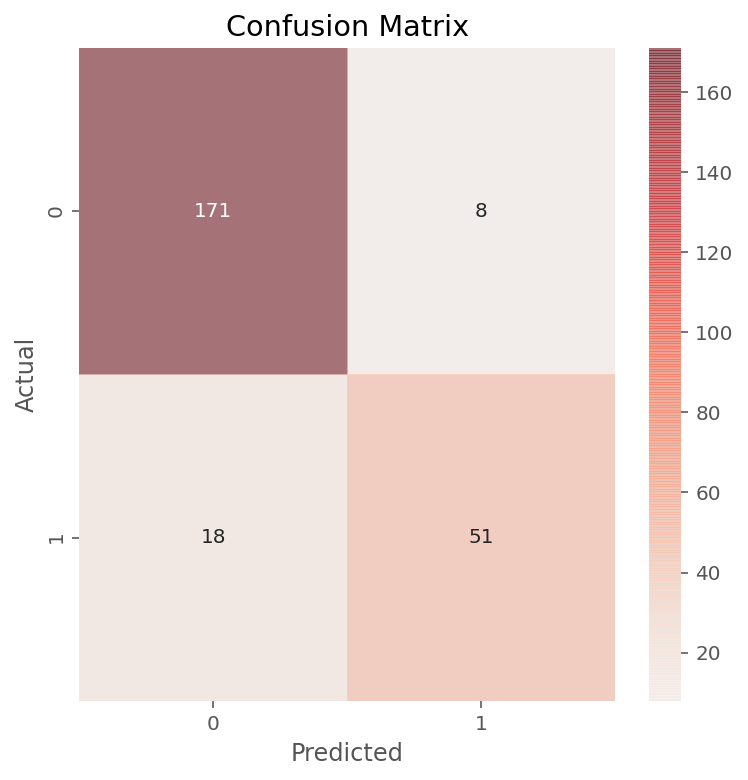

In [16]:
# creating the confusion matrix
pred = gs_mnb.predict(cvec_X_test)
tn, fp, fn, tp = confusion_matrix(cvec_y_test, pred).ravel()
print(f"True Negative: {tn}")
print(f"False positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

#specificity of our set
spec = tn/(tn+fp)
print(f"Specificity: {round(spec,4)}")

#sensitivity of our set (recall)
sens = tp/(tp+fn)
print(f"Sensitivity/Recall: {round(sens,4)}")

#precision of our set
precs = tp/(tp+fp)
print(f"Precision: {round(precs,4)}")

#create Pred chart
pred_proba = [i[1] for i in gs_mnb.predict_proba(cvec_X_test)]
pred_df = pd.DataFrame({'true_values': cvec_y_test, 'pred_proba': pred_proba})


#calculate score ROC AUC
roc_auc =roc_auc_score(pred_df['true_values'], pred_df['pred_proba'])
print(f"Double-checked ROC_AUC: {round(roc_auc,4)}")

# Create figure.
plt.figure(figsize = (5,5))
fpr, tpr, threshold = metrics.roc_curve(pred_df['true_values'], pred_df['pred_proba'])
roc_auc = metrics.auc(fpr, tpr)

#plot ROC_AUC plot
plt.title(f"Multinomial NB - Cvec ROC_AUC: {round(roc_auc,4)}", size=12)
plt.plot(fpr, tpr, color='salmon', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='grey')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', size=12)
plt.xlabel('False Positive Rate', size=12)


#plot confusion matrix
data = confusion_matrix(cvec_y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(cvec_y_test),
                     index = np.unique(cvec_y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (6,6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, cmap="Reds", annot=True, fmt='g', alpha=0.5);

<div class="alert alert-block alert-info">
<b>Final Model ROC_AUC Score: 0.9577 </b> 
    
Compared to the initial model ROC_AUC score of 0.9599, the final model has a slightly lower score. 
    
However, the optimised model has minimised overfitting and has scored better at its test score compared to its best score 0.9472
    
</div>

***

- Back to: [3.0 Model Building](#3.0-Model-Building)
- Go to [Defined Functions](#Defined-Functions:)

Jump to:
- [1.0 Data Collection and Cleaning](01_data_collection_&_cleaning.ipynb)
- [2.0 EDA & Data Preprocessing](02_eda_&_data_processing.ipynb)
<!-- - [3.0 Model Building](03_model_building.ipynb) -->
- [4.0 Reddit Classification Report](04_reddit_classification_report.ipynb)

***